In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
)

In [4]:
df = pd.read_csv('data/data.csv')
X = df['text']
y = df['source']
y = np.where(y == 'Human', 1, 0)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
vectorizer = TfidfVectorizer(
    max_features=30_000,
    ngram_range=(1, 2),
    stop_words='english'
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print('TF-IDF matrix shape:', X_train_tfidf.shape)

TF-IDF matrix shape: (631137, 30000)


In [7]:
model = LogisticRegression(max_iter=400, n_jobs=-1)
model.fit(X_train_tfidf, y_train)

596.19s - Error patching args (debugger not attached to subprocess).
Traceback (most recent call last):
  File "/Users/asherkhan/Coding Projects/Python/Natural Language Processing/705.641-nlp-final-project/.venv/lib/python3.13/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/pydev_monkey.py", line 541, in patch_args
    new_args.append(_get_python_c_args(host, port, code, unquoted_args, SetupHolder.setup))
                    ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/asherkhan/Coding Projects/Python/Natural Language Processing/705.641-nlp-final-project/.venv/lib/python3.13/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/pydev_monkey.py", line 193, in _get_python_c_args
    if "__future__" in code:
       ^^^^^^^^^^^^^^^^^^^^
TypeError: a bytes-like object is required, not 'str'
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,400
,multi_class,'deprecated'



Accuracy: 0.8749754412650125

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     88246
           1       0.88      0.82      0.85     69539

    accuracy                           0.87    157785
   macro avg       0.88      0.87      0.87    157785
weighted avg       0.88      0.87      0.87    157785



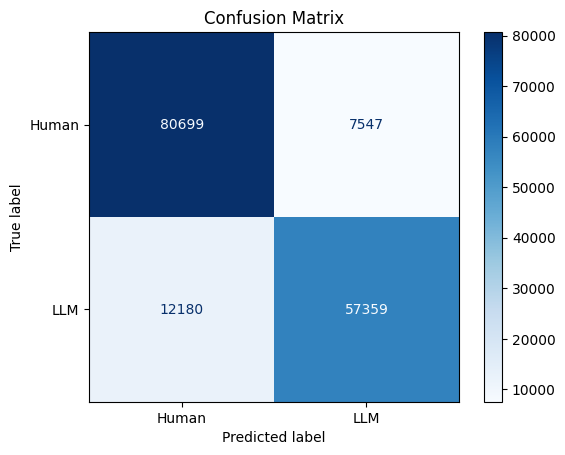

In [ ]:
y_pred = model.predict(X_test_tfidf)

print('\nAccuracy:', accuracy_score(y_test, y_pred))
print('\nClassification report:\n', classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Human', 'LLM'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_author(text: str):
    tfidf = vectorizer.transform([text])
    pred = model.predict(tfidf)[0]
    return 'LLM' if pred == 1 else 'Human'

print('\nExample prediction:')
print(predict_author('This is a very coherent paragraph written in a formal tone.'))


Example prediction:
LLM
